In [255]:
# Third-party imports
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

# Load in D1 training data
mat = spio.loadmat('D2.mat', squeeze_me=True)
d = mat['d']
# Index = mat['Index']
# sorted_Index = sorted(Index)
# Class = mat['Class']

In [256]:
import scipy.signal as spsig

In [257]:
numtaps = 4311
fl, fu =  150/12500, 2000/12500

filter_coef = spsig.firwin(numtaps, [fl,fu], pass_zero=False, window='hamming')
filtered_d = spsig.lfilter(filter_coef, 1.0, d)

filtered_d = np.roll(filtered_d, -(numtaps/2))

In [258]:
dt = 1/25000
f = d[0:2000]
f  = filtered_d[0:2000]
n = len(f)
fhat = np.fft.fft(f,n)                        # Compute FFT
PSD = fhat * np.conj(fhat) / n                # Power spectrum
freq = (1/(dt*n)) * np.arange(n)              # X-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int')  # Only plot first half


In [259]:
sd_array = [abs(x)/0.6745 for x in f]
dynamic_threshold = 3*np.median(sd_array)

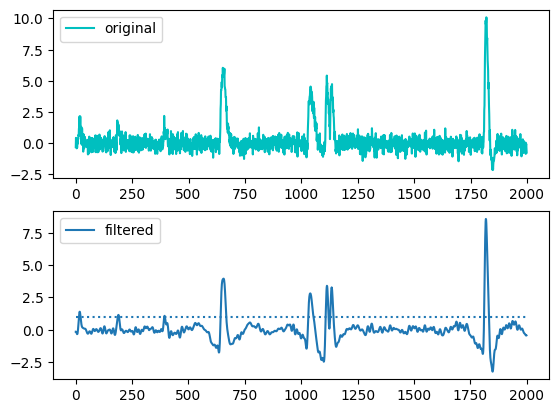

In [260]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(d[0:2000], color='c',label='original')
plt.legend()

plt.sca(axs[1])
plt.plot(f,label='filtered')
plt.hlines([dynamic_threshold], linestyle=[':'], xmin=0, xmax=len(f))
plt.legend()

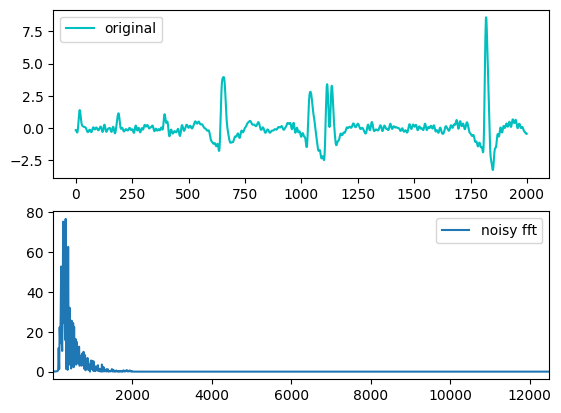

In [261]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(f, color='c',label='original')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],label='noisy fft')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

In [262]:
indices = PSD > 0.15*(max(PSD[L]))
PSD_clean = PSD * indices
fhat = indices * fhat
f_filt = np.fft.ifft(fhat)

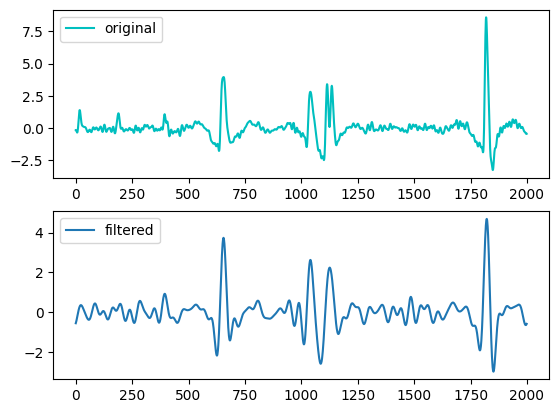

In [263]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(f, color='c',label='original')
plt.legend()

plt.sca(axs[1])
plt.plot(f_filt,label='filtered')
plt.legend()

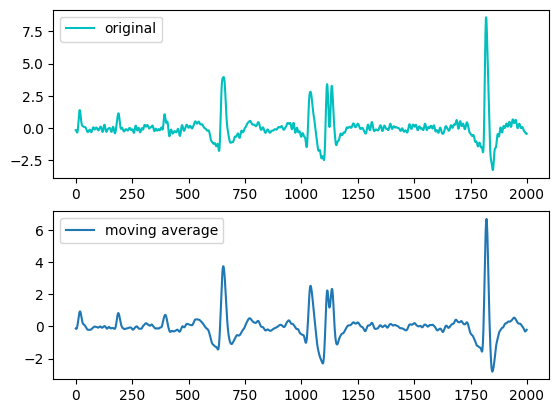

In [264]:
window_size = 15
moving_avg =  np.convolve(f, np.ones(window_size)/window_size, mode='same')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(f, color='c',label='original')
plt.legend()

plt.sca(axs[1])
plt.plot(moving_avg,label='moving average')
plt.legend()

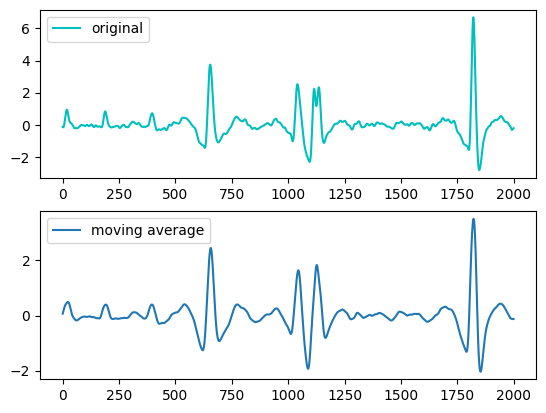

In [265]:
window_size = 30
moving_avg_2 =  np.convolve(moving_avg, np.ones(window_size)/window_size, mode='same')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(moving_avg, color='c',label='original')
plt.legend()

plt.sca(axs[1])
plt.plot(moving_avg_2,label='moving average')
plt.legend()

In [266]:
sd_array = [abs(x)/0.6745 for x in filtered_d]
dynamic_threshold = 5*np.median(sd_array)